# Stroke Predicton - Unsupervised

##  Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Import Dataset

In [2]:
dataframe = pd.read_csv('healthcare-dataset-stroke-data.csv',index_col=0)
print(dataframe.head(5))

       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1

Attribute Information
* 1) id: unique identifier p
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Tratamento dos Dados

In [3]:
media_com = dataframe[dataframe['stroke']==1]
print("média do bmi dos individuos que tiveram stroke:", np.round(media_com["bmi"].mean(),1))


media_sem = dataframe[dataframe['stroke']==0]
print("média do bmi dos individuos que não tiveram stroke:", np.round(media_sem["bmi"].mean(),1))

#Substituir missing values pela média dos valores, arredondado a uma casa décimal
media_bmi = np.round(dataframe["bmi"].mean(),2)
print("média bmi: " + str(media_bmi))
dataframe['bmi'] = dataframe['bmi'].fillna(media_bmi)
dataframe.isnull().sum()

#Tratamento de dados
X = dataframe.dropna(axis = 0, how ='any')
X = pd.concat([X,pd.get_dummies(X['gender'], prefix='gender')],axis=1)
X = pd.concat([X,pd.get_dummies(X['ever_married'], prefix='ever_married')],axis=1)
X = pd.concat([X,pd.get_dummies(X['work_type'], prefix='work_type')],axis=1)
X = pd.concat([X,pd.get_dummies(X['Residence_type'], prefix='Residence_type')],axis=1)
X = pd.concat([X,pd.get_dummies(X['smoking_status'], prefix='smoking_status')],axis=1)
X = X.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
print(X.info())

média do bmi dos individuos que tiveram stroke: 30.5
média do bmi dos individuos que não tiveram stroke: 28.8
média bmi: 28.89
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   uint8  
 7   gender_Male                     5110 non-null   uint8  
 8   gender_Other                    5110 non-null   uint8  
 9   ever_married_No                 5110 non-null   uint8  
 10  ever_married_Yes         

### PCA Projection to 2D

In [4]:
#PCA
features = ['age','hypertension','heart_disease','avg_glucose_level','bmi', 'gender_Female','gender_Male',
            'gender_Other','ever_married_No','work_type_Never_worked','work_type_Private',
            'work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban',
            'smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked',
            'smoking_status_smokes']

x = X.loc[:, features].values
y = X.loc[:,['stroke']].values
x = StandardScaler().fit_transform(x)
#pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)
df = dataframe.dropna()
df = df.reset_index(drop=True)
finalDf = pd.concat([principalDf, df[['stroke']]], axis = 1)
print(finalDf)
pca.explained_variance_ratio_

      principal component 1  principal component 2  stroke
0                 -2.517290               3.141064       1
1                 -1.640241              -0.907253       1
2                 -2.092631               1.898076       1
3                 -1.444247              -0.809567       1
4                 -2.300949              -0.607473       1
...                     ...                    ...     ...
5105              -2.195180              -1.179528       0
5106              -2.230754              -0.939188       0
5107              -0.774267              -1.382052       0
5108              -0.955658               1.969322       0
5109               0.732779              -0.947029       0

[5110 rows x 3 columns]


array([0.17772119, 0.1096154 ])

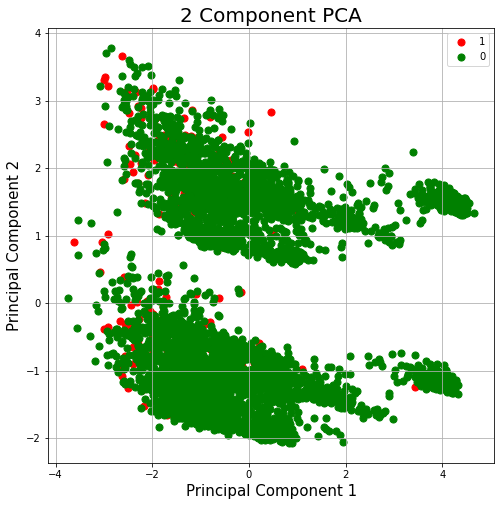

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



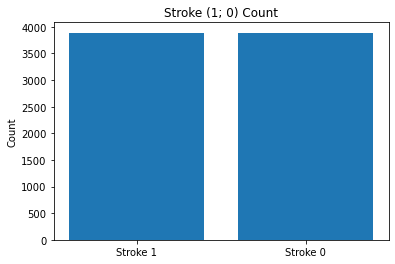

In [6]:
#Tratamento de dados
X = dataframe.dropna(axis = 0, how ='any')
X = pd.concat([X,pd.get_dummies(X['gender'], prefix='gender')],axis=1)
X = pd.concat([X,pd.get_dummies(X['ever_married'], prefix='ever_married')],axis=1)
X = pd.concat([X,pd.get_dummies(X['work_type'], prefix='work_type')],axis=1)
X = pd.concat([X,pd.get_dummies(X['Residence_type'], prefix='Residence_type')],axis=1)
X = pd.concat([X,pd.get_dummies(X['smoking_status'], prefix='smoking_status')],axis=1)
X = X.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
# Remove 'id' and 'target' columns
labels = ['age',                            
    'hypertension',               
    'heart_disease',                  
    'avg_glucose_level',               
    'bmi',                                                   
    'gender_Female',                  
    'gender_Male',                     
    'gender_Other',                      
    'ever_married_No',                
   'ever_married_Yes',                
   'work_type_Govt_job',               
   'work_type_Never_worked',         
   'work_type_Private',                 
   'work_type_Self-employed',          
   'work_type_children',              
   'Residence_type_Rural',             
   'Residence_type_Urban',            
   'smoking_status_Unknown',          
   'smoking_status_formerly smoked',  
   'smoking_status_never smoked',     
   'smoking_status_smokes']
df = X.dropna()
df = df.reset_index(drop=True)
X = df[labels]
y = df['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=66)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 5)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train = pd.DataFrame(y_train_oversampled ,columns=['stroke'])

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

df = pd.concat([X_train, y_train], axis = 1)
stroke_1 = df[df['stroke']==1]
stroke_1 = stroke_1['stroke'].count()
stroke_0 = df[df['stroke']==0]
stroke_0 = stroke_0['stroke'].count()

objects = ('Stroke 1', 'Stroke 0')
Count = [stroke_1, stroke_0]
y_pos = np.arange(len(objects))

plt.bar(objects, Count)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Stroke (1; 0) Count')

plt.show()

In [7]:
X = df.dropna(axis = 0, how ='any')

features = ['age','hypertension','heart_disease','avg_glucose_level','bmi', 'gender_Female','gender_Male',
            'gender_Other','ever_married_No','work_type_Never_worked','work_type_Private',
            'work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban',
            'smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked',
            'smoking_status_smokes']

x = X.loc[:, features].values
y = X.loc[:,['stroke']].values
x = StandardScaler().fit_transform(x)
#pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)
df = df.dropna()
df = df.reset_index(drop=True)
finalDf = pd.concat([principalDf, df[['stroke']]], axis = 1)
print(finalDf.head)
pca.explained_variance_ratio_

<bound method NDFrame.head of       principal component 1  principal component 2  stroke
0                 -0.385657              -2.556721       1
1                 -0.610882              -0.913545       0
2                 -0.378939              -0.779979       0
3                 -0.194488               2.092004       0
4                 -0.881967               2.197074       0
...                     ...                    ...     ...
7773              -1.132079              -1.553603       1
7774              -0.214408               1.197263       1
7775              -1.660261               0.543995       1
7776              -2.001070               1.021807       1
7777              -1.406791               0.172975       1

[7778 rows x 3 columns]>


array([0.16192319, 0.09335861])

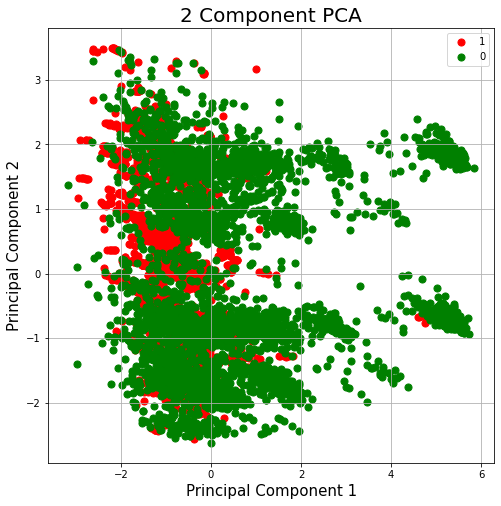

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stroke'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# K-Means



In [10]:
print(X_train_oversampled)
print(y_train_oversampled)
print

            age  hypertension  heart_disease  avg_glucose_level        bmi  \
0     81.000000             0              0          81.950000  16.900000   
1     52.000000             0              0          62.540000  35.000000   
2     51.000000             0              0          82.590000  26.200000   
3     79.000000             0              1          96.790000  24.700000   
4     78.000000             1              1          92.900000  30.400000   
...         ...           ...            ...                ...        ...   
7773  77.599466             0              0         109.511389  30.544993   
7774  58.984557             0              0          72.811392  28.368185   
7775  55.794967             0              1         212.856447  36.422650   
7776  68.000000             0              0         242.379081  41.218404   
7777  66.322267             0              0         226.060917  28.359766   

      gender_Female  gender_Male  gender_Other  ever_married_No